## File analyzes whether we can predict reviews of restaurants given restaurant characteristics

In [139]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
sb.set_style("darkgrid")
import statsmodels.formula.api as smf

In [8]:
#Import Yelp Dataset
data = pd.read_csv('https://raw.githubusercontent.com/vc1492a/Yelp-Challenge-Dataset/master/Prepped%20Data/output.csv')
data.iloc[0:6,]

,business_id,city,full_address,latitude,longitude,name,review_count,stars,state,type,...,Pakistani,Barbeque,Vietnamese,Asian Fusion,Diners,Greek,Vegetarian,Number_of_Checkins,Number_of_Tips,Number_of_Tip_Likes
0,5UmKMjUEUNdYWqANhGckJw,Dravosburg,"4734 Lebanon Church Rd Dravosburg, PA 15034",40.354327,-79.900706,Mr Hoagie,4,4.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
1,UsFtqoBl7naz8AVUBZMjQQ,Dravosburg,"202 McClure St Dravosburg, PA 15034",40.350553,-79.886814,Clancy's Pub,4,3.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
2,3eu6MEFlq2Dg7bQh8QbdOg,Dravosburg,"1 Ravine St Dravosburg, PA 15034",40.350956,-79.889059,Joe Cislo's Auto,3,5.0,PA,business,...,0,0,0,0,0,0,0,0,0,0
3,cE27W9VPgO88Qxe4ol6y_g,Bethel Park,"1530 Hamilton Rd Bethel Park, PA 15234",40.354116,-80.014660,Cool Springs Golf Center,5,2.5,PA,business,...,0,0,0,0,0,0,0,9,1,0
4,HZdLhv6COCleJMo7nPl-RA,Pittsburgh,"301 South Hills Village Pittsburgh, PA 15241",40.357620,-80.059980,Verizon,5,2.5,PA,business,...,0,0,0,0,0,0,0,0,0,0
5,mVHrayjG3uZ_RLHkLj-AMg,rankin,"414 Hawkins Ave rankin, PA 15104",40.413464,-79.880247,Emil's Lounge,20,5.0,PA,business,...,0,0,0,0,0,0,0,23,1,1


In [9]:
print data.shape

(72742, 89)


## Understanding the Dataset

 FieldName|Type|Description
 ---------|----|-----------
business_id|integer (0 or 1)|business_id
city|string|city
full_address|string|full_address
latitude|double|latitude
longitude|double|longitude
name|string|name of restaurant
review_count|integer|number of reviews
stars|double (rounded to nearest 0.5)|rating of the restaurant
state|string|state
type|string|all of these are labeled as business
Sunday_Open|double (time)|Sunday_Open
Sunday_Close|double (time)|Sunday_Close
Monday_Open|double (time)|Monday_Open
Monday_Close|double (time)|Monday_Close
Tuesday_Open|double (time)|Tuesday_Open
Tuesday_Close|double (time)|Tuesday_Close
Wednesday_Open|double (time)|Wednesday_Open
Wednesday_Close|double (time)|Wednesday_Close
Thursday_Open|double (time)|Thursday_Open
Thursday_Close|double (time)|Thursday_Close
Friday_Open|double (time)|Friday_Open
Friday_Close|double (time)|Friday_Close
Saturday_Open|double (time)|Saturday_Open
Saturday_Close|double (time)|Saturday_Close
Noise Level|string|Average, Quiet, Loud, Very Loud
Attire|string|Casual, Dressy, Formal
Alcohol|string|Full Bar, Beer and Wine, None
Price_Range|integer (1 to 4)|1 (cheap) to 4 (expensive)
Delivery|integer (0 or 1)|0 = N, 1 = Y
Outdoor_Seating|integer (0 or 1)|0 = N, 1 = Y
Drive-Thru|integer (0 or 1)|0 = N, 1 = Y
Good_for_Groups|integer (0 or 1)|0 = N, 1 = Y
Has_TV|integer (0 or 1)|0 = N, 1 = Y
Caters|integer (0 or 1)|0 = N, 1 = Y
Waiter_Service|integer (0 or 1)|0 = N, 1 = Y
Good_for_Kids|integer (0 or 1)|0 = N, 1 = Y
Accepts_Credit_Cards|integer (0 or 1)|0 = N, 1 = Y
Takes_Reservations|integer (0 or 1)|0 = N, 1 = Y
Wi_Fi|string|No, Free, Paid
Happy_Hour|integer (0 or 1)|0 = N, 1 = Y
Good_for_Dancing|integer (0 or 1)|0 = N, 1 = Y
Smoking|integer (0 or 1)|Outdoor, No, Yes
BYOB|integer (0 or 1)|0 = N, 1 = Y
Corkage|integer (0 or 1)|0 = N, 1 = Y
Take_Out|integer (0 or 1)|0 = N, 1 = Y
Coat_Check|integer (0 or 1)|0 = N, 1 = Y
Parking_Street|integer (0 or 1)|0 = N, 1 = Y
Parking_Valet|integer (0 or 1)|0 = N, 1 = Y
Parking_Lot|integer (0 or 1)|0 = N, 1 = Y
Parking_Garage|integer (0 or 1)|0 = N, 1 = Y
Parking_Validated|integer (0 or 1)|0 = N, 1 = Y
Music_DJ|integer (0 or 1)|0 = N, 1 = Y
Music_Karaoke|integer (0 or 1)|0 = N, 1 = Y
Music_Video|integer (0 or 1)|0 = N, 1 = Y
Music_Live|integer (0 or 1)|0 = N, 1 = Y
Music_Jukebox|integer (0 or 1)|0 = N, 1 = Y
Music_Background_Music|integer (0 or 1)|0 = N, 1 = Y
Is_Restaurants|integer (0 or 1)|0 = N, 1 = Y (is it a restaurant)
Sandwiches|integer (0 or 1)|0 = N, 1 = Y
Fast Food|integer (0 or 1)|0 = N, 1 = Y
Nightlife|integer (0 or 1)|0 = N, 1 = Y
Pizza|integer (0 or 1)|0 = N, 1 = Y
Bars|integer (0 or 1)|0 = N, 1 = Y
Mexican|integer (0 or 1)|0 = N, 1 = Y
Food|integer (0 or 1)|0 = N, 1 = Y
American (Traditional)|integer (0 or 1)|0 = N, 1 = Y
Burgers|integer (0 or 1)|0 = N, 1 = Y
Chinese|integer (0 or 1)|0 = N, 1 = Y
Italian|integer (0 or 1)|0 = N, 1 = Y
American (New)|integer (0 or 1)|0 = N, 1 = Y
Breakfast & Brunch|integer (0 or 1)|0 = N, 1 = Y
Thai|integer (0 or 1)|0 = N, 1 = Y
Indian|integer (0 or 1)|0 = N, 1 = Y
Sushi Bars|integer (0 or 1)|0 = N, 1 = Y
Korean|integer (0 or 1)|0 = N, 1 = Y
Mediterranean|integer (0 or 1)|0 = N, 1 = Y
Japanese|integer (0 or 1)|0 = N, 1 = Y
Seafood|integer (0 or 1)|0 = N, 1 = Y
Middle Eastern|integer (0 or 1)|0 = N, 1 = Y
Pakistani|integer (0 or 1)|0 = N, 1 = Y
Barbeque|integer (0 or 1)|0 = N, 1 = Y
Vietnamese|integer (0 or 1)|0 = N, 1 = Y
Asian Fusion|integer (0 or 1)|0 = N, 1 = Y
Diners|integer (0 or 1)|0 = N, 1 = Y
Greek|integer (0 or 1)|0 = N, 1 = Y
Vegetarian|integer (0 or 1)|0 = N, 1 = Y
Number_of_Checkins|integer|Number_of_Checkins
Number_of_Tips|integer|Number_of_Tips
Number_of_Tip_Likes|integer (0 to 18)|Number_of_Tip_Like

In [10]:
#Keep only restaurants
data_rest = data[data["Is_Restaurants"] == 1]
data_rest.shape

(22264, 89)

In [11]:
#Keep only columns I hypothesize might be important for predicting rating
cols_to_keep = ['business_id', 'stars','state', 'review_count','Noise Level', 'Attire', 'Price_Range', 'Delivery', 'Good_for_Groups', 'Waiter_Service','Number_of_Checkins','Take_Out','Number_of_Tips']
data1 = data_rest[cols_to_keep]
data1.head()

,business_id,stars,state,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips
0,5UmKMjUEUNdYWqANhGckJw,4.5,PA,4,average,casual,1.0,0.0,1.0,0.0,0,1.0,0
5,mVHrayjG3uZ_RLHkLj-AMg,5.0,PA,20,average,casual,1.0,0.0,1.0,1.0,23,1.0,1
7,KayYbHCt-RkbGcPdGOThNg,4.0,PA,21,loud,casual,1.0,0.0,1.0,1.0,55,1.0,2
14,wJr6kSA5dchdgOdwH6dZ2w,3.5,PA,8,NaN,casual,1.0,0.0,1.0,1.0,15,1.0,1
18,fNGIbpazjTRdXgwRY_NIXA,4.0,PA,7,average,casual,1.0,0.0,1.0,1.0,11,1.0,2


In [12]:
#Check number of states
data1["state"].value_counts()

AZ     8857
NV     5518
NC     2239
PA     1549
EDH    1155
WI     1103
QC      611
BW      395
ON      323
IL      299
SC      124
MLN      71
ELN       7
RP        5
FIF       3
KHL       1
NW        1
NM        1
TX        1
Name: state, dtype: int64

In [13]:
#Keep only 5 largest states
data2 = data1[data1["state"].isin(["AZ", "NC", "NV","PA", "WI"])]

In [14]:
#Check for null data
data2.isnull().sum()

business_id              0
stars                    0
state                    0
review_count             0
Noise Level           3927
Attire                1125
Price_Range            862
Delivery              1505
Good_for_Groups       1016
Waiter_Service        2477
Number_of_Checkins       0
Take_Out              1100
Number_of_Tips           0
dtype: int64

In [15]:
#Drop rows where data is null
data3 = data2.dropna()
data3.isnull().sum()

business_id           0
stars                 0
state                 0
review_count          0
Noise Level           0
Attire                0
Price_Range           0
Delivery              0
Good_for_Groups       0
Waiter_Service        0
Number_of_Checkins    0
Take_Out              0
Number_of_Tips        0
dtype: int64

In [16]:
#Describe data
data3.describe()

,stars,review_count,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips
count,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000
mean,3.494834,91.666387,1.567818,0.183665,0.906736,0.588761,278.991763,0.947644,23.304014
std,0.677748,182.652176,0.608361,0.387224,0.290812,0.492076,602.432149,0.222752,44.632931
min,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,17.000000,1.000000,0.000000,1.000000,0.000000,36.000000,1.000000,4.000000
50%,3.500000,42.000000,2.000000,0.000000,1.000000,1.000000,102.000000,1.000000,10.000000
75%,4.000000,98.000000,2.000000,0.000000,1.000000,1.000000,278.000000,1.000000,25.000000
max,5.000000,5642.000000,4.000000,1.000000,1.000000,1.000000,16641.000000,1.000000,1148.000000


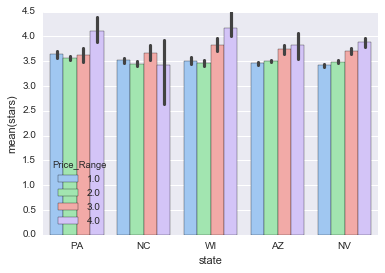

In [17]:
#plot ratings by state and price range
sb.barplot(x="state", y="stars",hue="Price_Range", data=data3, palette = "pastel")

In [18]:
from collections import Counter
Counter(data3["stars"])

Counter({1.0: 23,
         1.5: 164,
         2.0: 482,
         2.5: 1296,
         3.0: 2606,
         3.5: 4197,
         4.0: 4000,
         4.5: 1404,
         5.0: 153})

(array([   23.,   164.,   482.,  1296.,     0.,  2606.,  4197.,  4000.,
         1404.,   153.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

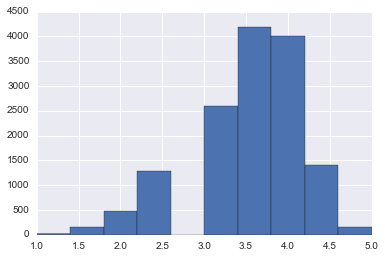

In [19]:
#look at distribution of ratings
plt.hist(data3["stars"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c2dba10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c764990>]], dtype=object)

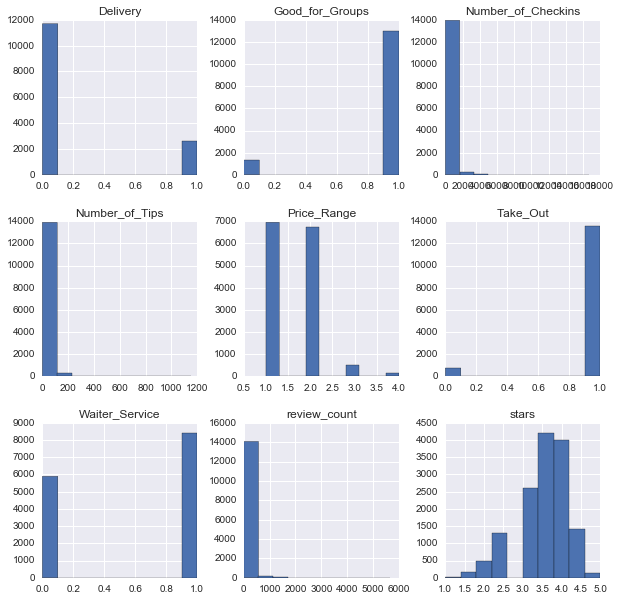

In [20]:
#look at distribution of other variables
data3.hist(figsize=(10,10))

I wanted to simplify the prediction problem -- instead of trying to predict the exact rating for a restaurant, I just want to know if the rating is good (above the median) or not good (the median or below).

In [21]:
#Create a broader ratings category (more evenly distributed, simpler question to answer)
data3["overall_rating"]=data3["stars"].apply(lambda x: 1 if x>3.5 else 0)

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [22]:
data3["overall_rating"].value_counts()

0    8768
1    5557
Name: overall_rating, dtype: int64

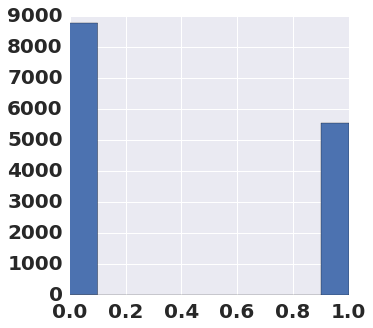

In [318]:
plt.hist(data3["overall_rating"])
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [23]:
data3["Noise Level"].value_counts()

average      9905
quiet        3037
loud         1003
very_loud     380
Name: Noise Level, dtype: int64

In [24]:
data3["Attire"].value_counts()

casual    13938
dressy      374
formal       13
Name: Attire, dtype: int64

In [216]:
data3["Price_Range"].value_counts()

1.0    6955
2.0    6735
3.0     506
4.0     129
Name: Price_Range, dtype: int64

In [346]:
data3["Delivery"].value_counts()

0.0    11694
1.0     2631
Name: Delivery, dtype: int64

In [348]:
data3["Good_for_Groups"].value_counts()

1.0    12989
0.0     1336
Name: Good_for_Groups, dtype: int64

In [181]:
lreg_data2.head()

,overall_rating,log_reviews,deliv_1.0,groups_1.0,waiter_1.0,takeout_1.0,price_2.0,price_3.0,price_4.0,noise_1,...,attire_1,state_AZ,state_NC,state_NV,state_PA,intercept,price_1.0,noise_4,state_WI,probability
0,1,1.386294,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.267068
5,1,2.995732,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.422161
7,1,3.044522,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.264597
18,1,1.945910,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.302190
19,1,4.060443,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.555613


In [223]:
#convert noise level into numbers
#convert attire into numbers
#add price range 3 and 4 into one category, because there are fewer of them

data3['noise'] = 1
data3['noise'][data3["Noise Level"] == "average"] = 2
data3['noise'][data3["Noise Level"] == "loud"] = 3
data3['noise'][data3["Noise Level"] == "very_loud"] = 4
data3['attire'] = 2
data3['attire'][data3["Attire"] == "casual"]  = 1
data3['price'] = 3
data3['price'][data3["Price_Range"] == 2.0] = 2
data3['price'][data3["Price_Range"] == 1.0] = 1


data3.head()

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__ma

,business_id,stars,state,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips,overall_rating,noise,attire,log_tips,log_reviews,log_checkins,price
0,5UmKMjUEUNdYWqANhGckJw,4.5,PA,4,average,casual,1.0,0.0,1.0,0.0,0,1.0,0,1,2,1,-inf,1.386294,-inf,1
5,mVHrayjG3uZ_RLHkLj-AMg,5.0,PA,20,average,casual,1.0,0.0,1.0,1.0,23,1.0,1,1,2,1,0.000000,2.995732,3.135494,1
7,KayYbHCt-RkbGcPdGOThNg,4.0,PA,21,loud,casual,1.0,0.0,1.0,1.0,55,1.0,2,1,3,1,0.693147,3.044522,4.007333,1
18,fNGIbpazjTRdXgwRY_NIXA,4.0,PA,7,average,casual,1.0,0.0,1.0,1.0,11,1.0,2,1,2,1,0.693147,1.945910,2.397895,1
19,b9WZJp5L1RZr4F1nxclOoQ,4.5,PA,58,average,casual,1.0,0.0,0.0,1.0,108,1.0,5,1,2,1,1.609438,4.060443,4.682131,1


## Look at relationships between variables

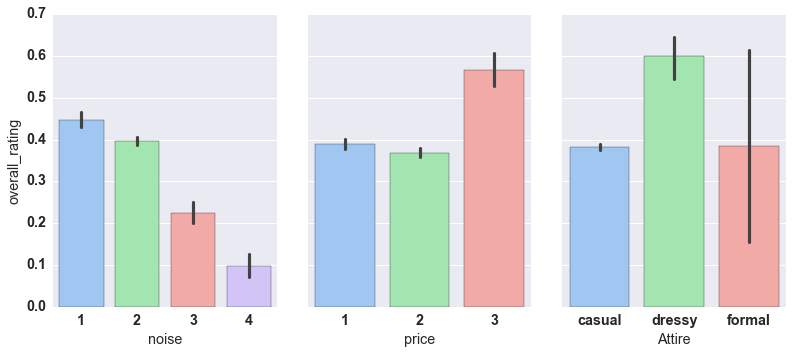

In [225]:
g = sb.PairGrid(data3, x_vars=["noise", "price", "Attire"],
                y_vars =["overall_rating"],
               aspect = .75, size = 5)

g.map(sb.barplot, palette = "pastel");

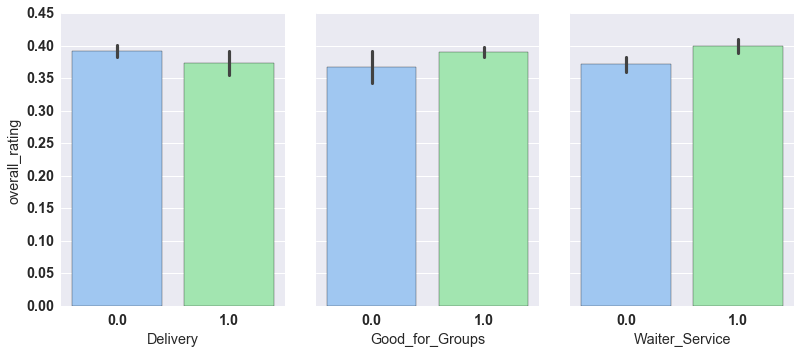

In [160]:
g = sb.PairGrid(data3, x_vars=["Delivery", "Good_for_Groups", "Waiter_Service"],
                y_vars =["overall_rating"],
               aspect = .75, size = 5)

g.map(sb.barplot, palette = "pastel");

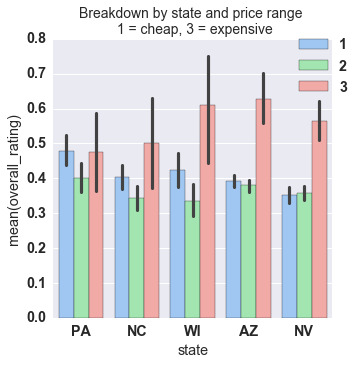

In [226]:
sb.barplot(x="state", y="overall_rating",hue="price", data=data3, palette = "pastel")
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Breakdown by state and price range \n 1 = cheap, 3 = expensive", fontsize=14)

In [227]:
table = pd.crosstab(index=data3["state"], 
                           columns=data3["price"])
table

price,1,2,3
state,,,
AZ,3426,3035,174
NC,757,808,62
NV,1930,1938,283
PA,483,572,80
WI,359,382,36


In [208]:
table = pd.crosstab(index=data3["state"], 
                           columns=data3["noise"])
table

noise,1,2,3,4
state,,,,
AZ,1410,4603,427,195
NC,301,1152,134,40
NV,907,2895,248,101
PA,266,719,125,25
WI,153,536,69,19


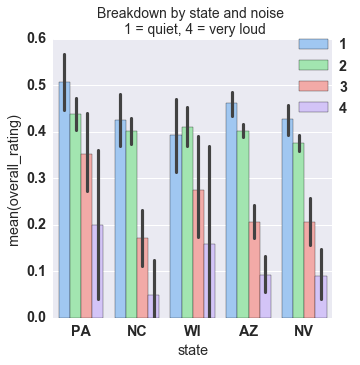

In [209]:
sb.barplot(x="state", y="overall_rating",hue="noise", data=data3, palette = "pastel")
ax = plt.subplot(111)
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Breakdown by state and noise \n 1 = quiet, 4 = very loud", fontsize=14)

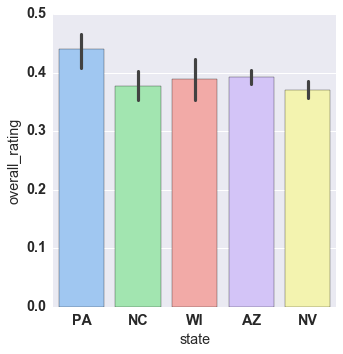

In [159]:
g = sb.PairGrid(data3, x_vars=["state"],
                y_vars =["overall_rating"],
               size = 5)

g.map(sb.barplot, palette = "pastel");

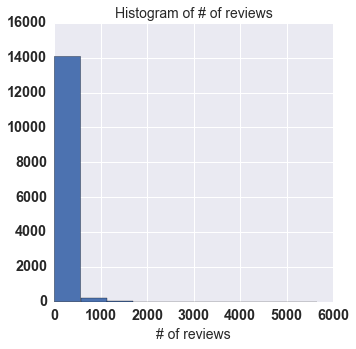

In [158]:
plt.hist(data3["review_count"])
plt.xlabel('# of reviews',fontsize=14)
plt.title("Histogram of # of reviews", fontsize=14)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [31]:
#After noticing there were some outliers in the tips, reviews, and check-in columns that might unnecessarily skew the results, I decided to log the data to reduce their effect.

data3["log_tips"]=np.log(data3["Number_of_Tips"])
data3["log_reviews"]=np.log(data3["review_count"])
data3["log_checkins"]=np.log(data3["Number_of_Checkins"])

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/Lavitsky/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

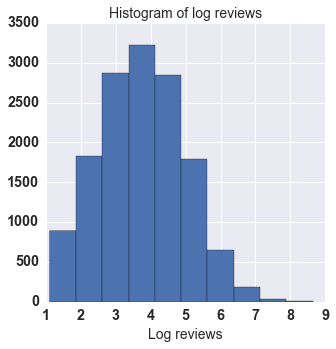

In [163]:
plt.hist(data3["log_reviews"])
plt.xlabel('Log reviews',fontsize=14)
plt.title("Histogram of log reviews", fontsize=14)

In [32]:
data3.head()

,business_id,stars,state,review_count,Noise Level,Attire,Price_Range,Delivery,Good_for_Groups,Waiter_Service,Number_of_Checkins,Take_Out,Number_of_Tips,overall_rating,noise,attire,log_tips,log_reviews,log_checkins
0,5UmKMjUEUNdYWqANhGckJw,4.5,PA,4,average,casual,1.0,0.0,1.0,0.0,0,1.0,0,1,2,1,-inf,1.386294,-inf
5,mVHrayjG3uZ_RLHkLj-AMg,5.0,PA,20,average,casual,1.0,0.0,1.0,1.0,23,1.0,1,1,2,1,0.000000,2.995732,3.135494
7,KayYbHCt-RkbGcPdGOThNg,4.0,PA,21,loud,casual,1.0,0.0,1.0,1.0,55,1.0,2,1,3,1,0.693147,3.044522,4.007333
18,fNGIbpazjTRdXgwRY_NIXA,4.0,PA,7,average,casual,1.0,0.0,1.0,1.0,11,1.0,2,1,2,1,0.693147,1.945910,2.397895
19,b9WZJp5L1RZr4F1nxclOoQ,4.5,PA,58,average,casual,1.0,0.0,0.0,1.0,108,1.0,5,1,2,1,1.609438,4.060443,4.682131


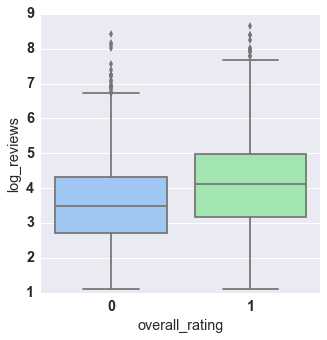

In [164]:
#Higher rated restaurants also tend to have a higher number of reviews
sb.boxplot(x="overall_rating", y="log_reviews", data=data3, palette = "pastel");

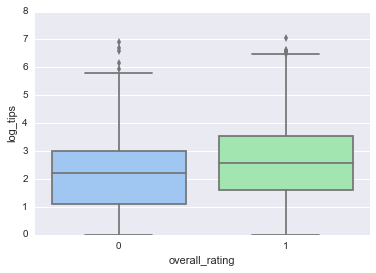

In [34]:
#Higher rated restaurants also have more tips
sb.boxplot(x="overall_rating", y="log_tips", data=data3, palette = "pastel");

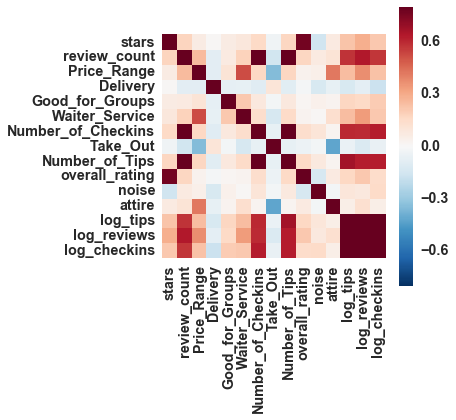

In [165]:
#Check correlations. Noticed that reviews, tips, and checkins are extremely correlated, so probably don't need all three of them in my analysis.
corrmat = data3.corr()
sb.heatmap(corrmat, vmax=.8, square=True)

## Run logistic regression

In [229]:
# create a clean data frame for the regression & create dummy variables for categorical variables
cols_to_keep = ['overall_rating', 'log_reviews']


dummy_delivery = pd.get_dummies(data3['Delivery'],prefix="deliv")
dummy_groups = pd.get_dummies(data3['Good_for_Groups'],prefix="groups")
dummy_waiter = pd.get_dummies(data3['Waiter_Service'],prefix="waiter")
dummy_takeout = pd.get_dummies(data3['Take_Out'],prefix="takeout")
dummy_price = pd.get_dummies(data3['price'],prefix="price")
dummy_noise = pd.get_dummies(data3['noise'],prefix="noise")
dummy_attire = pd.get_dummies(data3['attire'],prefix="attire")
dummy_state = pd.get_dummies(data3['state'],prefix="state")


lreg_data = data3[cols_to_keep].join(dummy_delivery.ix[:, 'deliv_1.0':])
lreg_data = lreg_data.join(dummy_groups.ix[:, 'groups_1.0':])
lreg_data = lreg_data.join(dummy_waiter.ix[:, 'waiter_1.0':])
lreg_data = lreg_data.join(dummy_takeout.ix[:, 'takeout_1.0':])
lreg_data = lreg_data.join(dummy_price.ix[:, 'price_2':'price_3'])
lreg_data = lreg_data.join(dummy_noise.ix[:, 'noise_1': 'noise_3'])
lreg_data = lreg_data.join(dummy_attire.ix[:, :'attire_1'])
lreg_data = lreg_data.join(dummy_state.ix[:,0:4])

lreg_data.head()


,overall_rating,log_reviews,deliv_1.0,groups_1.0,waiter_1.0,takeout_1.0,price_2,price_3,noise_1,noise_2,noise_3,attire_1,state_AZ,state_NC,state_NV,state_PA
0,1,1.386294,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5,1,2.995732,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7,1,3.044522,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
18,1,1.945910,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
19,1,4.060443,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [230]:
# manually add the intercept
lreg_data['intercept'] = 1.0
train_cols = lreg_data.columns[1:]

In [231]:
logit = smf.Logit(lreg_data['overall_rating'],lreg_data[train_cols]).fit()

Optimization terminated successfully.
         Current function value: 0.622132
         Iterations 6


In [232]:
print logit.summary()

                           Logit Regression Results                           
Dep. Variable:         overall_rating   No. Observations:                14325
Model:                          Logit   Df Residuals:                    14309
Method:                           MLE   Df Model:                           15
Date:                Sat, 20 May 2017   Pseudo R-squ.:                 0.06840
Time:                        15:28:29   Log-Likelihood:                -8912.0
converged:                       True   LL-Null:                       -9566.4
                                        LLR p-value:                7.221e-270
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
log_reviews     0.4981      0.018     27.669      0.000         0.463     0.533
deliv_1.0      -0.0806      0.047     -1.700      0.089        -0.173     0.012
groups_1.0     -0.0097      0.065     -0.149    

In [233]:
#calculate odds ratio
print (np.exp(logit.params))

log_reviews    1.645613
deliv_1.0      0.922600
groups_1.0     0.990343
waiter_1.0     0.898089
takeout_1.0    0.850440
price_2        0.654690
price_3        0.911743
noise_1        7.733914
noise_2        4.593259
noise_3        2.209278
attire_1       0.760313
state_AZ       0.850763
state_NC       0.947906
state_NV       0.640966
state_PA       1.264307
intercept      0.048827
dtype: float64


In [236]:
#trying a simpler model
cols_to_keep = ['overall_rating', 'log_reviews']

dummy_price = pd.get_dummies(data3['price'],prefix="price")
dummy_noise = pd.get_dummies(data3['noise'],prefix="noise")

lreg_data_simple = data3[cols_to_keep].join(dummy_price.ix[:,'price_2':'price_2'])
lreg_data_simple = lreg_data_simple.join(dummy_noise.ix[:, 'noise_1': 'noise_3'])
lreg_data_simple = lreg_data_simple.join(dummy_state['state_NV'])
lreg_data_simple = lreg_data_simple.join(dummy_state['state_PA'])

lreg_data_simple.head()

,overall_rating,log_reviews,price_2,noise_1,noise_2,noise_3,state_NV,state_PA
0,1,1.386294,0.0,0.0,1.0,0.0,0.0,1.0
5,1,2.995732,0.0,0.0,1.0,0.0,0.0,1.0
7,1,3.044522,0.0,0.0,0.0,1.0,0.0,1.0
18,1,1.945910,0.0,0.0,1.0,0.0,0.0,1.0
19,1,4.060443,0.0,0.0,1.0,0.0,0.0,1.0


In [237]:
# manually add the intercept
lreg_data_simple['intercept'] = 1.0
train_cols_simple = lreg_data_simple.columns[1:]

In [238]:
logit_simple = smf.Logit(lreg_data_simple['overall_rating'],lreg_data_simple[train_cols_simple]).fit()

Optimization terminated successfully.
         Current function value: 0.622939
         Iterations 6


In [239]:
print logit_simple.summary()

                           Logit Regression Results                           
Dep. Variable:         overall_rating   No. Observations:                14325
Model:                          Logit   Df Residuals:                    14317
Method:                           MLE   Df Model:                            7
Date:                Sat, 20 May 2017   Pseudo R-squ.:                 0.06719
Time:                        15:29:28   Log-Likelihood:                -8923.6
converged:                       True   LL-Null:                       -9566.4
                                        LLR p-value:                2.204e-273
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
log_reviews     0.4922      0.017     28.887      0.000         0.459     0.526
price_2        -0.4741      0.038    -12.386      0.000        -0.549    -0.399
noise_1         2.0118      0.180     11.196    

In [240]:
#calculate odds ratio
print (np.exp(logit_simple.params))

log_reviews    1.635955
price_2        0.622435
noise_1        7.476790
noise_2        4.501933
noise_3        2.204840
state_NV       0.736481
state_PA       1.431698
intercept      0.027463
dtype: float64


In [241]:
#Run grid search with more complicated model

from sklearn import grid_search, cross_validation
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

gs = grid_search.GridSearchCV(
    estimator = LogisticRegression(), 
    param_grid = param_grid,
    scoring = 'roc_auc',
    cv = 5)
gs.fit(lreg_data[train_cols], lreg_data['overall_rating'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   8.48343e-05,   7.19686e-04,   6.10540e-03,
         5.17947e-02,   4.39397e-01,   3.72759e+00,   3.16228e+01,
         2.68270e+02,   2.27585e+03,   1.93070e+04,   1.63789e+05,
         1.38950e+06,   1.17877e+07,   1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [242]:
print gs.best_score_ 

0.664539727228


In [75]:
gs.best_estimator_.coef_

array([[ 0.49816182, -0.08145715, -0.00688716, -0.10611879, -0.14221679,
        -0.42342817, -0.14836262,  0.61505589,  2.04816053,  1.52886225,
         0.79625265, -0.13085878, -0.165324  , -0.05356051, -0.45274266,
         0.23559686, -1.59232304]])

In [243]:
#Run Gridsearch with simpler model
gs_simple = grid_search.GridSearchCV(
    estimator = LogisticRegression(), 
    param_grid = param_grid,
    scoring = 'roc_auc',
    cv = 5)
gs_simple.fit(lreg_data_simple[train_cols_simple], lreg_data_simple['overall_rating'])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   8.48343e-05,   7.19686e-04,   6.10540e-03,
         5.17947e-02,   4.39397e-01,   3.72759e+00,   3.16228e+01,
         2.68270e+02,   2.27585e+03,   1.93070e+04,   1.63789e+05,
         1.38950e+06,   1.17877e+07,   1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [244]:
print gs_simple.best_score_ 

0.670022275264


ROC_AUC from simple model is just as good as from model with more variables. Chose to look at ROC_AUC because it optimizes both over the true positive rate and the false positive rate. 

In [245]:
gs_simple.best_estimator_.coef_

array([[ 0.49222386, -0.47411585,  2.01140943,  1.5041267 ,  0.79029713,
        -0.30587535,  0.3588481 , -1.79726625]])

In [246]:
train_cols_simple

Index([u'log_reviews', u'price_2', u'noise_1', u'noise_2', u'noise_3',
       u'state_NV', u'state_PA', u'intercept'],
      dtype='object')

In [333]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Try random forest model instead of logistic regression in order to try a non-linear approach

X = lreg_data_simple[train_cols_simple]
y = lreg_data_simple['overall_rating']

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

n trees: 1, CV AUC [ 0.57314137  0.5761521   0.54238014], Average AUC 0.563891205927
n trees: 11, CV AUC [ 0.60477836  0.5997216   0.56899861], Average AUC 0.591166187133
n trees: 21, CV AUC [ 0.60606216  0.603494    0.56563118], Average AUC 0.591729112326
n trees: 31, CV AUC [ 0.60705832  0.60299404  0.56595133], Average AUC 0.592001226241
n trees: 41, CV AUC [ 0.60688394  0.60532815  0.56735961], Average AUC 0.593190567021
n trees: 51, CV AUC [ 0.60794508  0.60498724  0.5676599 ], Average AUC 0.593530738847
n trees: 61, CV AUC [ 0.60970458  0.60472456  0.56977251], Average AUC 0.594733881911
n trees: 71, CV AUC [ 0.6065121   0.60575136  0.56905617], Average AUC 0.59377320984
n trees: 81, CV AUC [ 0.60667577  0.60532815  0.56800453], Average AUC 0.593336150487
n trees: 91, CV AUC [ 0.60775261  0.60537433  0.56889623], Average AUC 0.594007725462


In [334]:
## Evaluating feature importances
model = RandomForestClassifier(n_estimators = 91)
# Fit a model on the whole dataset
model.fit(X, y)

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))


features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

CV AUC [ 0.60687332  0.60455313  0.57000913], Average AUC 0.593811861426


,Features,Importance Score
0,log_reviews,0.884097
1,price_2,0.026883
2,noise_1,0.026670
3,noise_2,0.018507
4,noise_3,0.017590


In [340]:
X1 = lreg_data[train_cols]
y1 = lreg_data['overall_rating']

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X1, y1, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

n trees: 1, CV AUC [ 0.55797092  0.57365506  0.52715103], Average AUC 0.552925670239
n trees: 11, CV AUC [ 0.60036004  0.61263004  0.57455793], Average AUC 0.595849335542
n trees: 21, CV AUC [ 0.60275041  0.6165226   0.57505797], Average AUC 0.598110327781
n trees: 31, CV AUC [ 0.59819399  0.61340469  0.57309189], Average AUC 0.594896859885
n trees: 41, CV AUC [ 0.60453853  0.61488648  0.57465975], Average AUC 0.598028249657
n trees: 51, CV AUC [ 0.60105664  0.61417657  0.57397233], Average AUC 0.596401846345
n trees: 61, CV AUC [ 0.60802336  0.6133356   0.57188697], Average AUC 0.597748645667
n trees: 71, CV AUC [ 0.60560558  0.61377987  0.57098316], Average AUC 0.596789536901
n trees: 81, CV AUC [ 0.6056282   0.61262847  0.57451265], Average AUC 0.597589772127
n trees: 91, CV AUC [ 0.60457397  0.61634619  0.57374078], Average AUC 0.598220316058


In [345]:
## Evaluating feature importances
model = RandomForestClassifier(n_estimators = 91)
# Fit a model on the whole dataset
model.fit(X1, y1)

scores = cross_val_score(model, X1, y1, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))


features = X1.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

print features_df

CV AUC [ 0.60556828  0.61333126  0.57475288], Average AUC 0.597884141873
       Features  Importance Score
0   log_reviews          0.785836
5       price_2          0.026887
1     deliv_1.0          0.023938
3    waiter_1.0          0.023842
2    groups_1.0          0.019214
7       noise_1          0.016248
13     state_NV          0.015010
11     state_AZ          0.014438
4   takeout_1.0          0.014401
8       noise_2          0.013526
12     state_NC          0.011065
9       noise_3          0.010118
14     state_PA          0.009546
6       price_3          0.008418
10     attire_1          0.007513
15    intercept          0.000000


In [342]:
X1.columns

Index([u'log_reviews', u'deliv_1.0', u'groups_1.0', u'waiter_1.0',
       u'takeout_1.0', u'price_2', u'price_3', u'noise_1', u'noise_2',
       u'noise_3', u'attire_1', u'state_AZ', u'state_NC', u'state_NV',
       u'state_PA', u'intercept'],
      dtype='object')

Random forest AUC is worse than logistic regression AUC. 

## Display Results

### Display random forest results

In [336]:
train_cols

Index([u'log_reviews', u'deliv_1.0', u'groups_1.0', u'waiter_1.0',
       u'takeout_1.0', u'price_2', u'price_3', u'noise_1', u'noise_2',
       u'noise_3', u'attire_1', u'state_AZ', u'state_NC', u'state_NV',
       u'state_PA', u'intercept'],
      dtype='object')

In [298]:
rand_forest_model = lreg_data
rand_forest_model = rand_forest_model.join(dummy_price['price_1'])
rand_forest_model = rand_forest_model.join(dummy_noise['noise_4'])
rand_forest_model = rand_forest_model.join(dummy_state['state_WI'])
rand_forest_model['probability_good_review_rf'] = model.predict_proba(lreg_data_simple[train_cols_simple]).T[1]

In [306]:
rand_forest_model.head()

,overall_rating,log_reviews,deliv_1.0,groups_1.0,waiter_1.0,takeout_1.0,price_2,price_3,noise_1,noise_2,...,state_AZ,state_NC,state_NV,state_PA,intercept,probability_good_review_rf,price_1,noise_4,state_WI,probability_good_review_logistic_reg
0,1,1.386294,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.552722,1.0,0.0,0.0,0.265884
5,1,2.995732,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.350991,1.0,0.0,0.0,0.420326
7,1,3.044522,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.866026,1.0,0.0,0.0,0.263271
18,1,1.945910,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.485088,1.0,0.0,0.0,0.300619
19,1,4.060443,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.978022,1.0,0.0,0.0,0.554440


In [311]:
rand_forest_model['noise_loud'] = rand_forest_model['noise_3'] + rand_forest_model['noise_4']
rand_forest_model['noise_quiet'] = rand_forest_model['noise_1'] + rand_forest_model['noise_2']

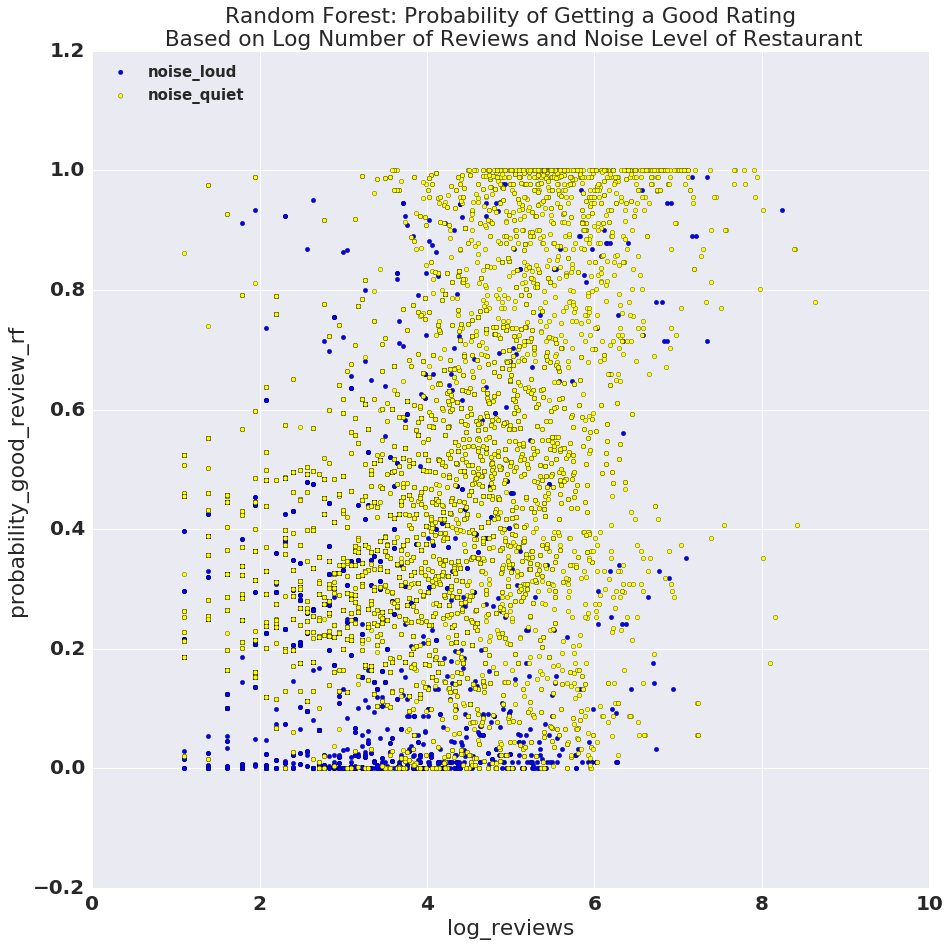

In [313]:
features_rf = ['noise_loud', 'noise_quiet', 'log_reviews']
ax1 = plt.subplot(111)
colors = ['blue', 'yellow']
for e, color in enumerate(colors):
    rand_forest_model[rand_forest_model[features_rf[e]] == 1].plot(x='log_reviews', y='probability_good_review_rf', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Random Forest: Probability of Getting a Good Rating\n Based on Log Number of Reviews and Noise Level of Restaurant')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 15}

plt.rc('font', **font)
# ax1.suptitle('test title', fontsize=20)
ax1.legend(lines[:2], labels=features_rf, loc='upper left',fontsize=15)  # legend for first two lines only

In [339]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

fig, ax = plot_partial_dependence(model, X,[0, (0, 1)])

ValueError: gbrt has to be an instance of BaseGradientBoosting

['price_1', 'price_2', 'price_3']
['noise_1', 'noise_2', 'noise_3', 'noise_4', 'log_reviews']
['state_AZ', 'state_NC', 'state_WI', 'state_NV', 'state_PA', 'log_reviews']


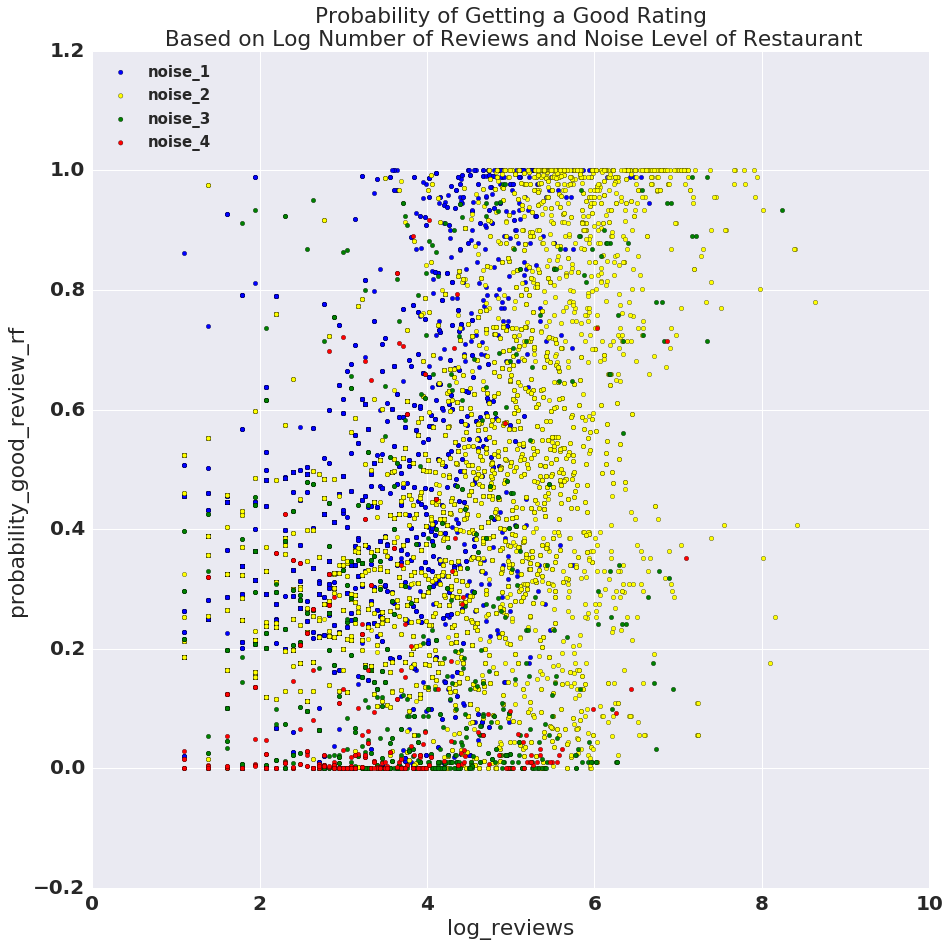

In [307]:
features = ['price_1', 'price_2', 'price_3']
print features

features2 = ['noise_1', 'noise_2', 'noise_3', 'noise_4', 'log_reviews']
print features2

features3 = ['state_AZ', 'state_NC', 'state_WI', 'state_NV','state_PA', 'log_reviews']
print features3

ax1 = plt.subplot(111)
colors = ['blue', 'yellow','green','red']
for e, color in enumerate(colors):
    rand_forest_model[rand_forest_model[features2[e]] == 1].plot(x='log_reviews', y='probability_good_review_rf', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Probability of Getting a Good Rating\n Based on Log Number of Reviews and Noise Level of Restaurant')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 15}

plt.rc('font', **font)
# ax1.suptitle('test title', fontsize=20)
ax1.legend(lines[:2], labels=features2, loc='upper left',fontsize=15)  # legend for first two lines only

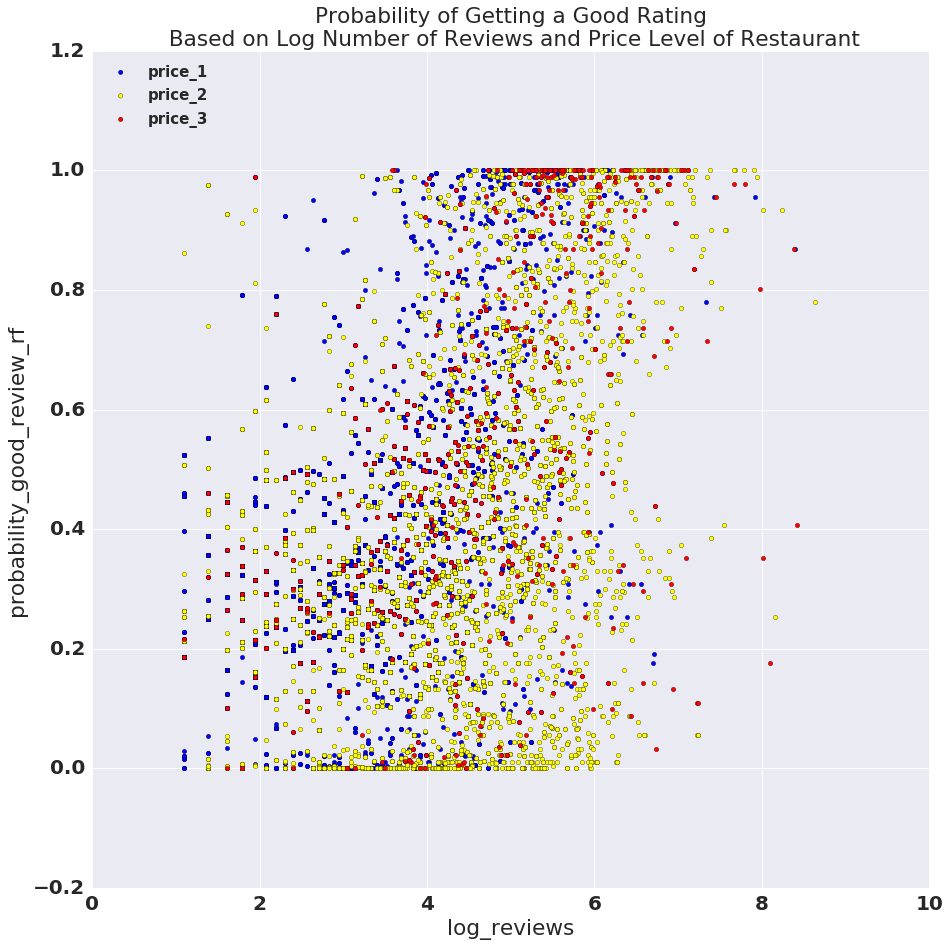

In [290]:
ax1 = plt.subplot(111)
colors = ['blue', 'yellow','red']
for e, color in enumerate(colors):
    rand_forest_model[rand_forest_model[features[e]] == 1].plot(x='log_reviews', y='probability_good_review_rf', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Probability of Getting a Good Rating\n Based on Log Number of Reviews and Price Level of Restaurant')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 15}

plt.rc('font', **font)
# ax1.suptitle('test title', fontsize=20)
ax1.legend(lines[:2], labels=features, loc='upper left',fontsize=15)  # legend for first two lines only

### Display logistic regression results

In [299]:
lreg_model = rand_forest_model
lreg_model['probability_good_review_logistic_reg'] = gs.predict_proba(lreg_data[train_cols]).T[1]

In [300]:
lreg_model.head()

,overall_rating,log_reviews,deliv_1.0,groups_1.0,waiter_1.0,takeout_1.0,price_2,price_3,noise_1,noise_2,...,state_AZ,state_NC,state_NV,state_PA,intercept,probability_good_review_rf,price_1,noise_4,state_WI,probability_good_review_logistic_reg
0,1,1.386294,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.552722,1.0,0.0,0.0,0.265884
5,1,2.995732,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.350991,1.0,0.0,0.0,0.420326
7,1,3.044522,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.866026,1.0,0.0,0.0,0.263271
18,1,1.945910,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.485088,1.0,0.0,0.0,0.300619
19,1,4.060443,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.978022,1.0,0.0,0.0,0.554440


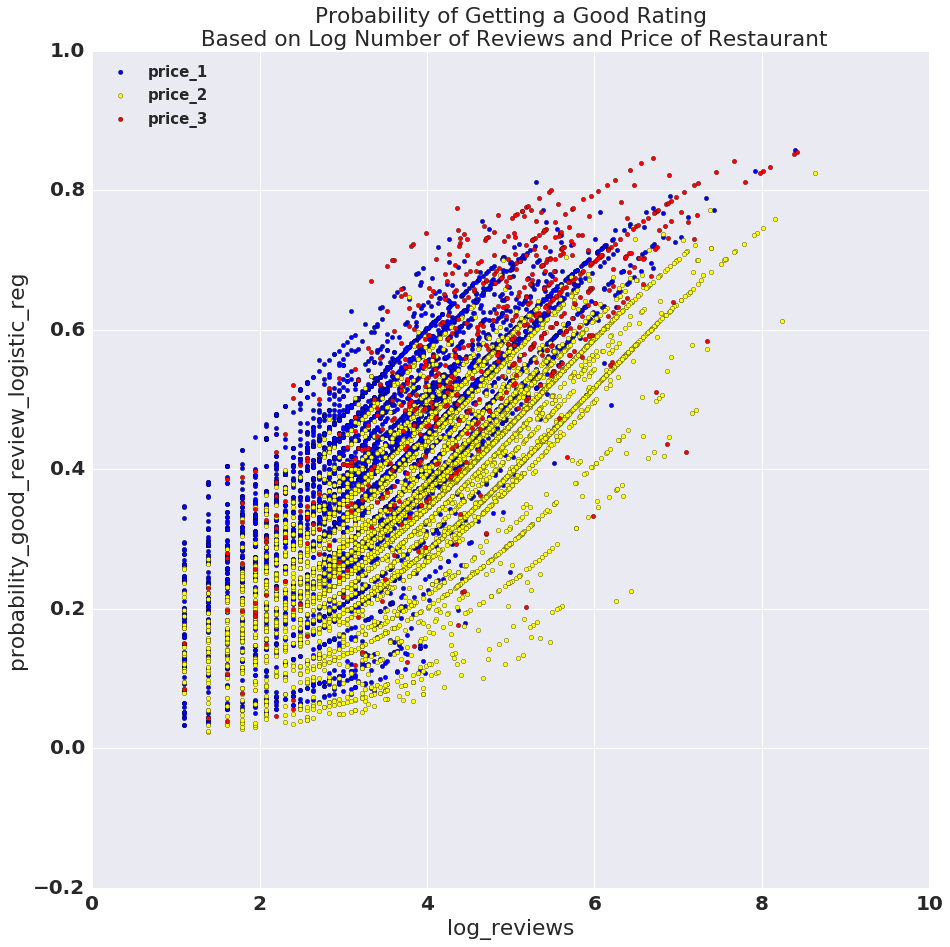

In [303]:
ax1 = plt.subplot(111)
colors = ['blue', 'yellow', 'red']
for e, color in enumerate(colors):
    lreg_model[lreg_model[features[e]] == 1].plot(x='log_reviews', y='probability_good_review_logistic_reg', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Probability of Getting a Good Rating\n Based on Log Number of Reviews and Price of Restaurant')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 15}

plt.rc('font', **font)
# ax1.suptitle('test title', fontsize=20)
ax1.legend(lines[:2], labels=features, loc='upper left',fontsize=15)  # legend for first two lines only

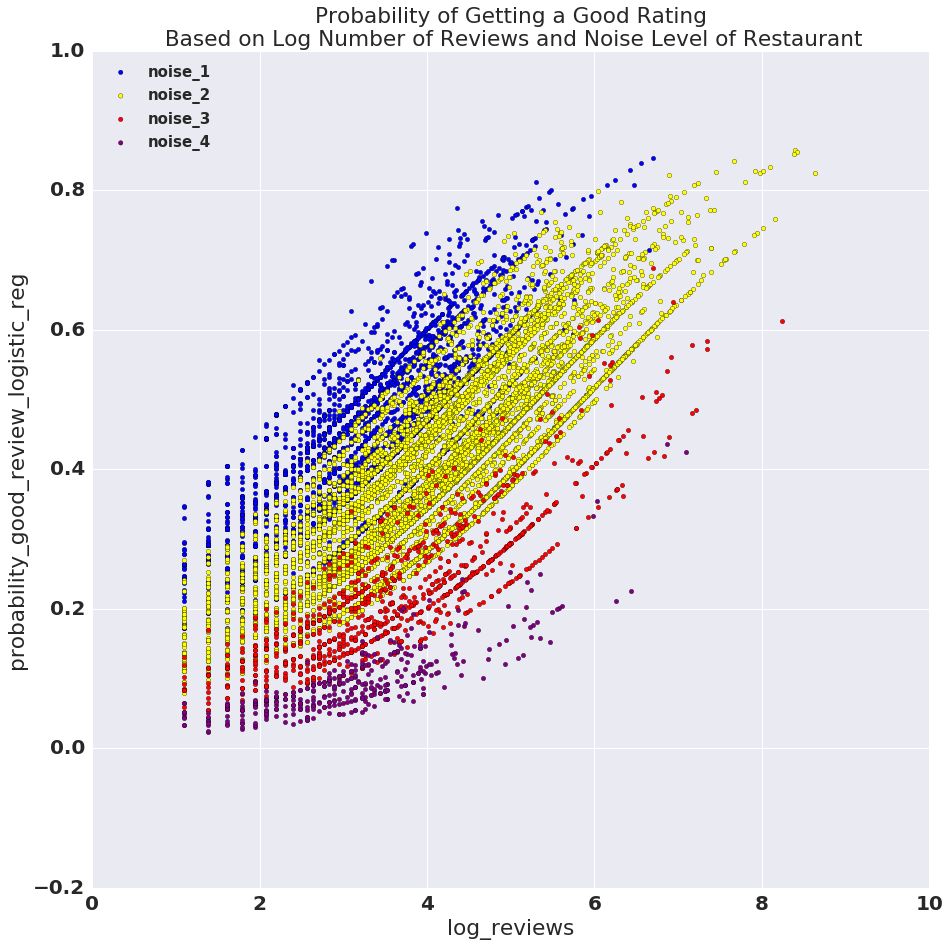

In [305]:
ax1 = plt.subplot(111)
colors = ['blue', 'yellow', 'red', 'purple']
for e, color in enumerate(colors):
    lreg_model[lreg_model[features2[e]] == 1].plot(x='log_reviews', y='probability_good_review_logistic_reg', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Probability of Getting a Good Rating\n Based on Log Number of Reviews and Noise Level of Restaurant')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 15}

plt.rc('font', **font)
# ax1.suptitle('test title', fontsize=20)
ax1.legend(lines[:2], labels=features2, loc='upper left',fontsize=15)  # legend for first two lines only

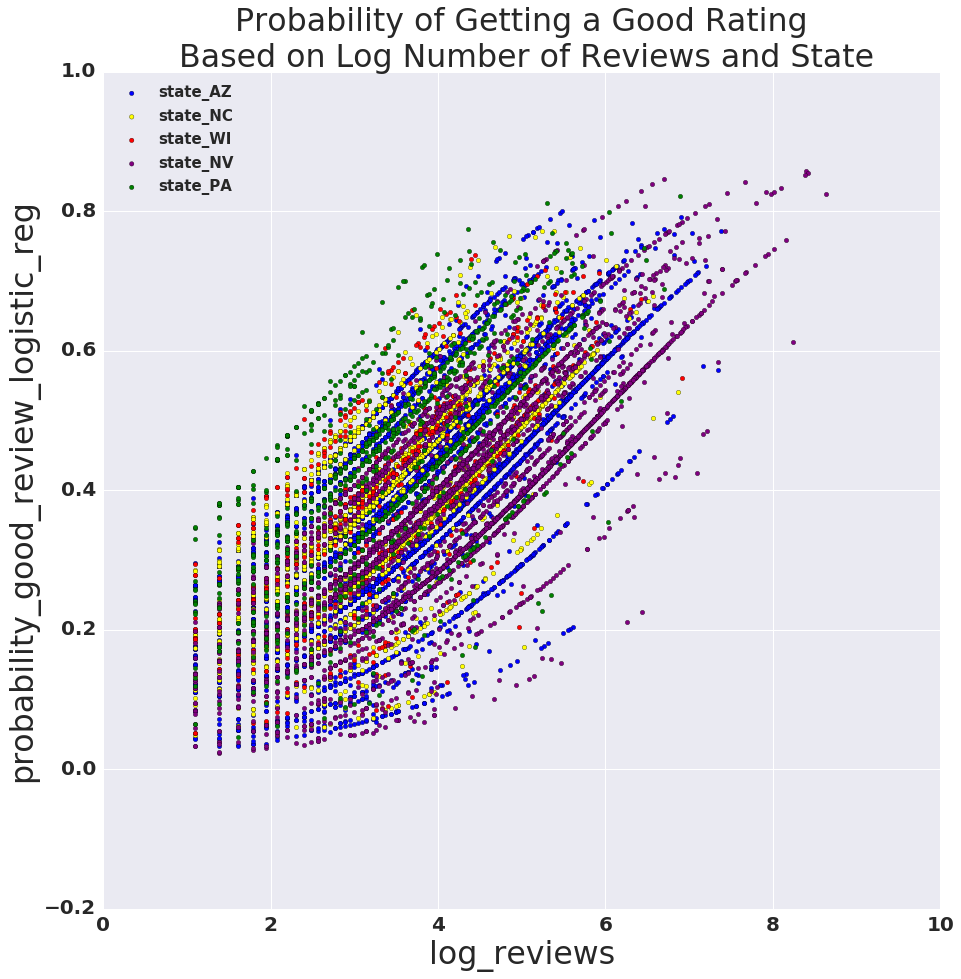

In [308]:
ax1 = plt.subplot(111)
colors = ['blue', 'yellow', 'red', 'purple', 'green']
for e, color in enumerate(colors):
    lreg_model[lreg_model[features3[e]] == 1].plot(x='log_reviews', y='probability_good_review_logistic_reg', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Probability of Getting a Good Rating\n Based on Log Number of Reviews and State')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 22}

plt.rc('font', **font)
# ax1.suptitle('test title', fontsize=20)
ax1.legend(lines[:2], labels=features3, loc='upper left',fontsize=15)  # legend for first two lines only

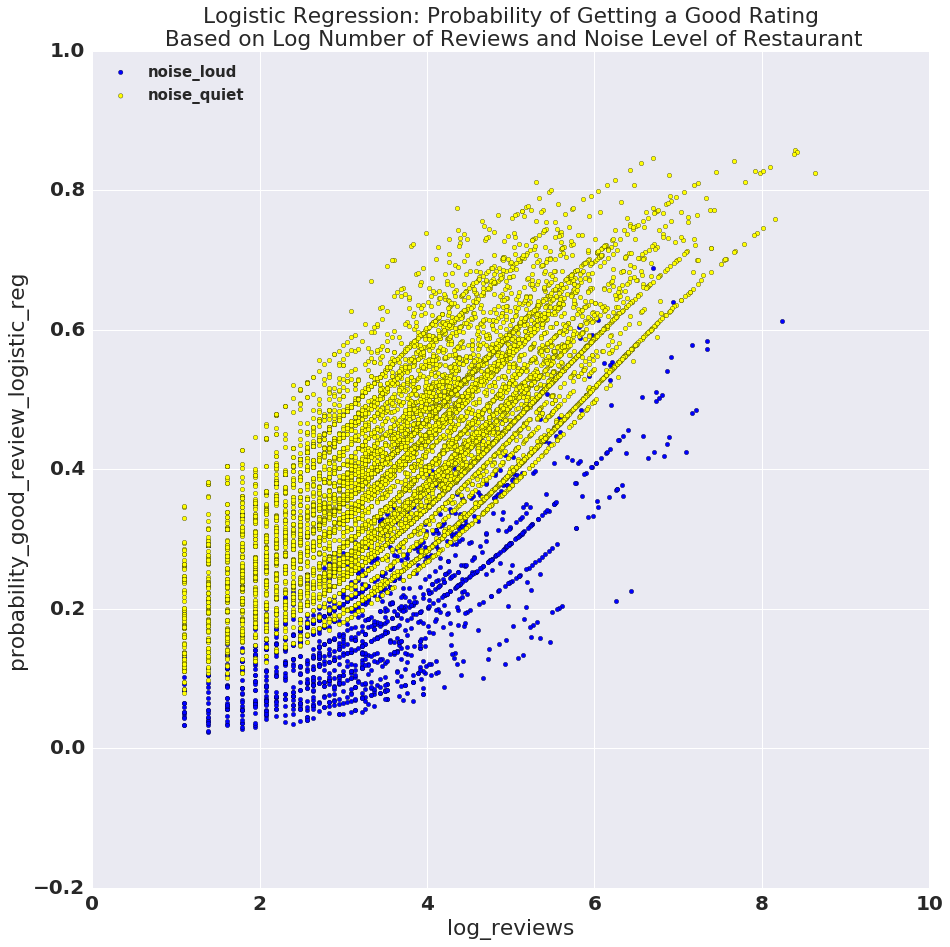

In [316]:
features_lm = ['noise_loud', 'noise_quiet', 'log_reviews']
ax1 = plt.subplot(111)
colors = ['blue', 'yellow']
for e, color in enumerate(colors):
    lreg_model[lreg_model[features_lm[e]] == 1].plot(x='log_reviews', y='probability_good_review_logistic_reg', kind='scatter', c=color, ax=ax1, figsize=(15,15))
ax1.set(title='Logistic Regression: Probability of Getting a Good Rating\n Based on Log Number of Reviews and Noise Level of Restaurant')

lines, labels = ax1.get_legend_handles_labels()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
font = {'family' : 'normal',
       'weight' : 'bold',
       'size'   : 15}

plt.rc('font', **font)
# ax1.suptitle('test title', fontsize=20)
ax1.legend(lines[:2], labels=features_rf, loc='upper left',fontsize=15)  # legend for first two lines only

# Text Review Analysis

### Can we use text reviews left from users to predict overall rating for restaurant

In [319]:
#Pull in data with text reviews
df = pd.read_csv('/Users/Lavitsky/Desktop/DAT_03_20_LINA_LAVITSKY/Final Project/yelp_academic_dataset_review.csv')
df.iloc[0:6,]

/Users/Lavitsky/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,2aFiy99vNLklCx3T_tGS9A,0,2011-10-10,0,NxL8SIC5yqOdnlXCg18IBg,5.0,If you enjoy service by someone who is as comp...,review,0.0,KpkOkG6RIf4Ra25Lhhxf1A
1,2aFiy99vNLklCx3T_tGS9A,0,2010-12-29,0,pXbbIgOXvLuTi_SPs1hQEQ,5.0,After being on the phone with Verizon Wireless...,review,1.0,bQ7fQq1otn9hKX-gXRsrgA
2,2aFiy99vNLklCx3T_tGS9A,0,2011-04-29,0,wslW2Lu4NYylb1jEapAGsw,5.0,Great service! Corey is very service oriented....,review,0.0,r1NUhdNmL6yU9Bn-Yx6FTw
3,2LfIuF3_sX6uwe-IR-P0jQ,1,2014-07-14,0,GP6YEearUWrzPtQYSF1vVg,5.0,Highly recommended. Went in yesterday looking ...,review,0.0,aW3ix1KNZAvoM8q-WghA3Q
4,2LfIuF3_sX6uwe-IR-P0jQ,0,2014-01-15,0,25RlYGq2s5qShi-pn3ufVA,4.0,I walked in here looking for a specific piece ...,review,0.0,YOo-Cip8HqvKp_p9nEGphw
5,2LfIuF3_sX6uwe-IR-P0jQ,1,2013-04-28,0,Uf1Ki1yyH_JDKhLvn2e4FQ,5.0,What a great place! Modern on Melrose has amaz...,review,2.0,bgl3j8yJcRO-00NkUYsXGQ


In [320]:
df.shape

(4153151, 10)

In [321]:
# Create a random sample of your dataframe (because otherwise analysis was taking too long to run)
df_sample = df.sample(n = 10000)

In [322]:
df_sample.shape

(10000, 10)

In [323]:
#check for nulls
df_sample["text"].isnull().sum()

0

(array([ 1348.,     0.,   896.,     0.,     0.,  1212.,     0.,  2505.,
            0.,  4039.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

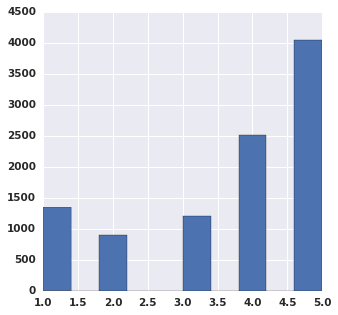

In [331]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (5, 5),
         'axes.labelsize': 'x-small',
         'axes.titlesize':'x-small',
         'xtick.labelsize':'x-small',
         'ytick.labelsize':'x-small'}
plt.rcParams.update(params)
plt.hist(df_sample["stars"])

In [325]:
df_sample["stars"].describe()

count    10000.00000
mean         3.69910
std          1.41646
min          1.00000
25%          3.00000
50%          4.00000
75%          5.00000
max          5.00000
Name: stars, dtype: float64

In [326]:
# Create a broader ratings category (more evenly distributed and a simpler problem). In this case, used above the median as a good rating, otherwise bad rating
df_sample["overall_rating"]=df_sample["stars"].apply(lambda x: 1 if x>4 else 0)

In [327]:
df_sample["overall_rating"].value_counts()

0    5961
1    4039
Name: overall_rating, dtype: int64

In [328]:
text = df_sample['text']

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

vectorizer = CountVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english',
                             binary=True)

# Use `fit` to learn the vocabulary of the titles
vectorizer.fit(text)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(text).toarray()
y = df_sample['overall_rating']


model = RandomForestClassifier(n_estimators = 20)
scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.78724273  0.80592144  0.81156043], Average AUC 0.801574866237


In [329]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words='english')


# Use `fit` to learn the vocabulary
vectorizer.fit(text)

# Use `tranform` to generate the sample X word matrix - one column per feature (word or n-grams)
X = vectorizer.transform(text).toarray()

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

CV AUC [ 0.79849179  0.8144219   0.82600611], Average AUC 0.812973268395
